**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle
import scipy as sp
from sklearn.neighbors import KDTree as KDTree_Sklearn


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    _algo = 'brute'
    _data = 0
    _target = 0
    _n_neighbors = 0
    _result = 0
    _full_results = 0
    _classes = 0
    _proba = 0

    def __init__(self, n_neighbors, algorithm='brute'):
        self._n_neighbors = n_neighbors
        self._algo = algorithm

    def fit(self, X, y):
        self._data = X
        self._target = y
        self._classes = np.unique(y)

    def predict(self, X):
        _n = self._n_neighbors

        if self._algo == 'brute':
            distances = sp.spatial.distance.cdist(X, self._data)
            ressorted = np.argsort(distances, axis=1)
            arr = self._target[ressorted][:, :_n]
        else:
            tree = KDTree_Sklearn(self._data)
            distances, ressorted = tree.query(X, k=_n)
            arr = self._target[ressorted][:, :_n]

        u, indices = np.unique(arr, return_inverse=True, axis=0)

        ax = 1
        u, indices = np.unique(arr, return_inverse=True)
        indreshape = indices.reshape(arr.shape)
        self._result = u[np.argmax(np.apply_along_axis(
            np.bincount, ax, indreshape, None, np.max(indices) + 1), axis=ax)]

        classes = self._classes
        output = []
        for c in classes:
            output.append(np.sum(arr == c, axis=1)/arr.shape[1])
        self._proba = np.vstack(output).T

        return self._result

    def predict_proba(self, X):
        _pred = self.predict(X)
        return self._proba

    def score(self, X, y):
        _pred = self.predict(X)
        cntarr = np.zeros(_pred.shape)
        cntarr[_pred == y] = 1
        return np.sum(cntarr)/len(cntarr)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [23]:
clf = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=3, algorithm='brute')

In [24]:
%time clf.fit(X_train, y_train)

CPU times: user 787 µs, sys: 623 µs, total: 1.41 ms
Wall time: 906 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
%time my_clf.fit(X_train, y_train)

CPU times: user 67 µs, sys: 54 µs, total: 121 µs
Wall time: 83.9 µs


In [26]:
%time clf.predict(X_test)

CPU times: user 1.3 ms, sys: 573 µs, total: 1.87 ms
Wall time: 1.39 ms


array([1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0])

In [27]:
%time my_clf.predict(X_test)

CPU times: user 1.28 ms, sys: 901 µs, total: 2.18 ms
Wall time: 1.47 ms


array([1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0])

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 985 µs, sys: 781 µs, total: 1.77 ms
Wall time: 1.09 ms


array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.4 ms, sys: 755 µs, total: 2.15 ms
Wall time: 1.62 ms


array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [30]:
clf.score(X_test, y_test)

0.9333333333333333

In [31]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [37]:
%matplotlib inline

In [68]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

nmax = 10
scores =[]
for n in range(2, nmax+1):
    my_clf = MyKNeighborsClassifier(n_neighbors=n, algorithm='brute')
    clf.fit(X_train, y_train)
    scores.append((n, clf.score(X_test, y_test)))

In [70]:
ns = [n[0] for n in scores]
grscores = [n[1] for n in scores]

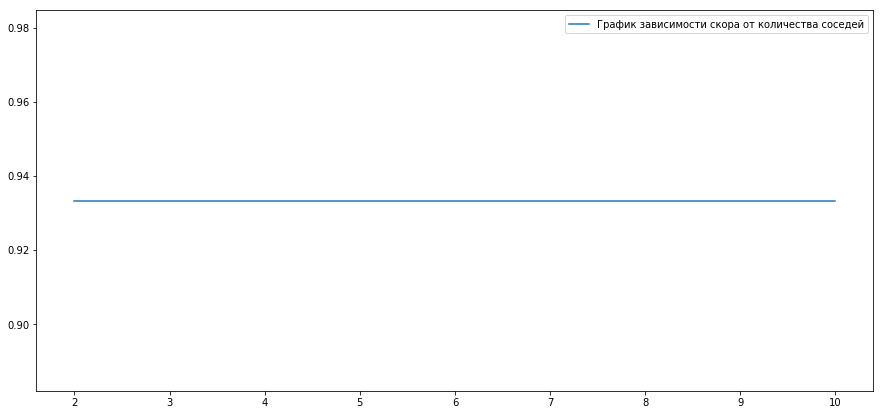

In [79]:
plt.figure(figsize=(15, 7))
plt.plot(ns, grscores)
plt.legend(['График зависимости скора от количества соседей'])

**MNIST**

In [85]:
mnist = fetch_mldata('MNIST original')

/anaconda3/envs/pt040p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/envs/pt040p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [Errno 60] Operation timed out

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 4

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
Бибиотека визуализации, написанная "поверх" matplotlib, более элегантная с точки зрения дизайна

# matplotlib
Библиотека визуализации для построения графиков, диаграмм и т.д. Де-факто стандарт для визуализации,
хотя сейчас уже появляется множество инсрументов для интерактивной графики - plotly, hicharts и т.д.

# train_test_split
Библиотека для разделение выборки (признаки и таргет) на соответствующие обучающие и тестовую выборки

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
Пайплайн для задач машинного обучения от sklearn, т.е. фреймворк, позволяющий логически объедить все 
задачи от препроцессинга и преобразования даннных до обучения моделей

# StandardScaler (from sklearn.preprocessing import StandardScaler)
Одна из стандартных библиотек нормализации данных (иногда называется ругательным словом "шкалирование")

Ниже группа базовых и миксин-классов sklearn
Миксин — это класс, предназначенный для расширения функциональности других классов

# ClassifierMixin
Класс-примесь для всех классификаторов sklearn

# NeighborsBase
Базовый класс для реализации алгоритма ближайших соседеней - определяет базовые методы
"""Base class for nearest neighbors estimators."""

# KNeighborsMixin
Класс, расширяющий базовый функцинал NeighborsBase
    
# SupervisedIntegerMixin
Еще один из базовых миксинов, опредеяющий метод fit для таргетов с целочисленными метками (судя по быстрому просмотру кода)